In this notebook we show that there are some problems with the file `normals.txt`, provided to us. Some images from it even though are expected to be *normal* (no calcificaitons), in fact are not.

Therefore, we decide to remove them from the list of normal images used for evaluation.

In [1]:
import sys; sys.path.insert(0, '../../')

import numpy as np
import matplotlib.pyplot as plt

from database.dataset import *

import feature_extraction.haar_features.haar_modules as hm
from general_utils.plots import plot_froc, plot_bootstrap_froc
from metrics.metrics import froc_curve, froc_curve_bootstrap
from candidate_proposal.candidate_utils import balance_candidates
from metrics.metrics_utils import (get_froc_df_of_img, get_froc_df_of_many_imgs_features,
                                   get_tp_fp_fn_center_patch_criteria)

pd.options.mode.chained_assignment = None
cmap = plt.get_cmap("tab10")

Check discrepancies between normals provided in normals.txt by professor and ours

In [9]:
db = INBreast_Dataset(
    return_lesions_mask=True,
    level='image',
    max_lesion_diam_mm=None,
    partitions=['train', 'validation', 'test'],
    lesion_types=['calcification', 'cluster'],
)

normal_imgs_ids = db.get_free_of_selected_lesions_imgs_ids()  # This means getting the not(cluster or calcification) images

Plot images that we have not considered as normals, but were included in normals.txt and overlay calcification ROIs on them.

In [31]:
brias_normals = pd.read_csv(Path.cwd().parent.parent/'data/normals.txt', index_col=False, header=None)[0].tolist()
print('Cases from our normals not present in Bria\'s')
print([i for i in normal_imgs_ids if i not in brias_normals])
print('Cases from our Bria\'s normals not present in our\'s')
print([i for i in brias_normals if i not in normal_imgs_ids])

Cases from our normals not present in Bria's
[]
Cases from our Bria's normals not present in our's
[24055600, 24055654, 24065380, 24065407, 24065434, 24065461, 22580492, 22580520, 22580548, 22580576]


In [34]:
pd.DataFrame(normal_imgs_ids, columns=['image_ids']).to_csv('../../data/our_normals.txt')

Brias normals: 105, ours: 95


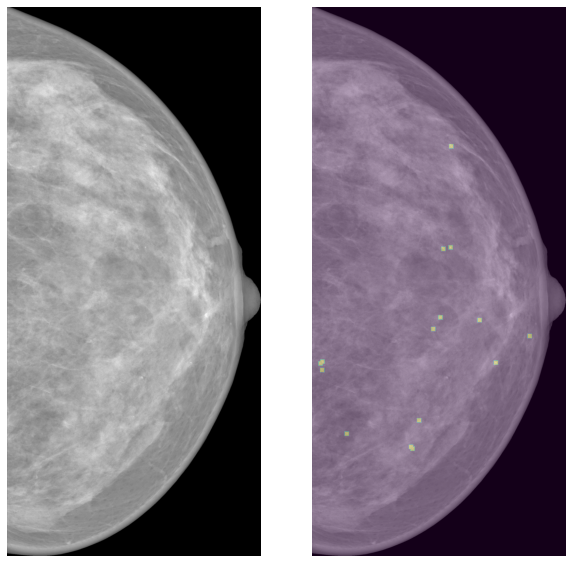

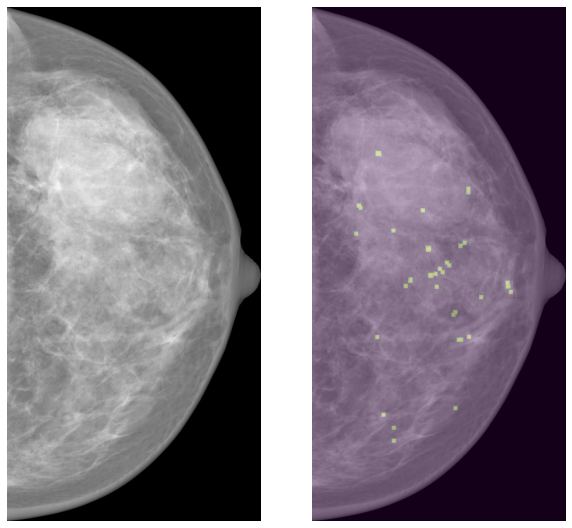

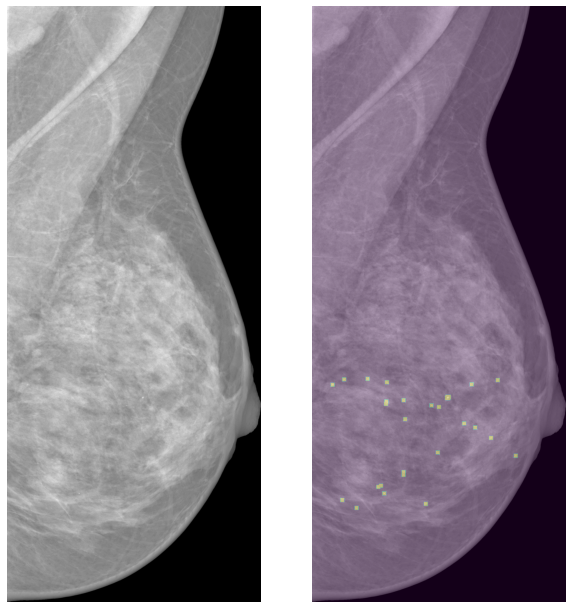

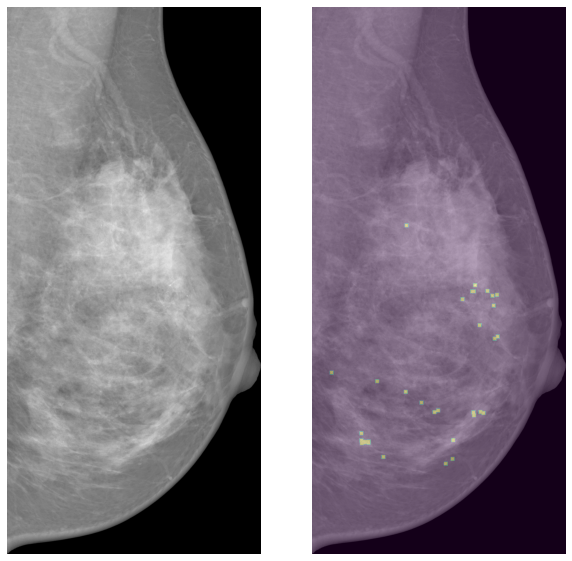

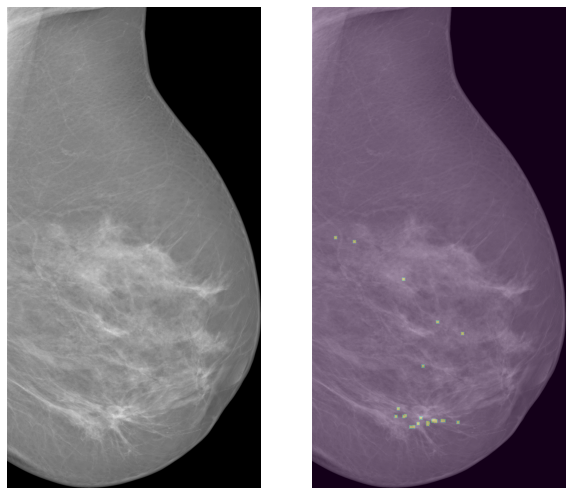

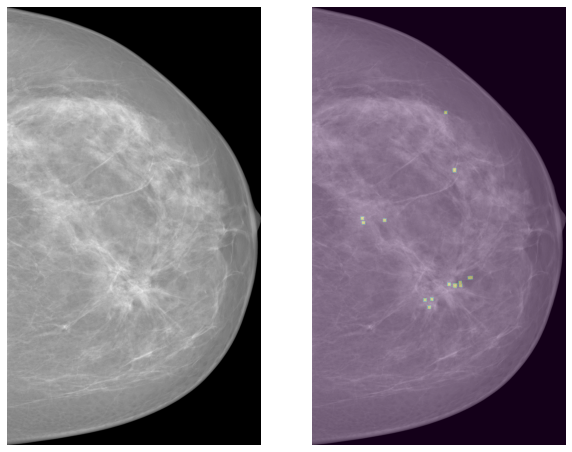

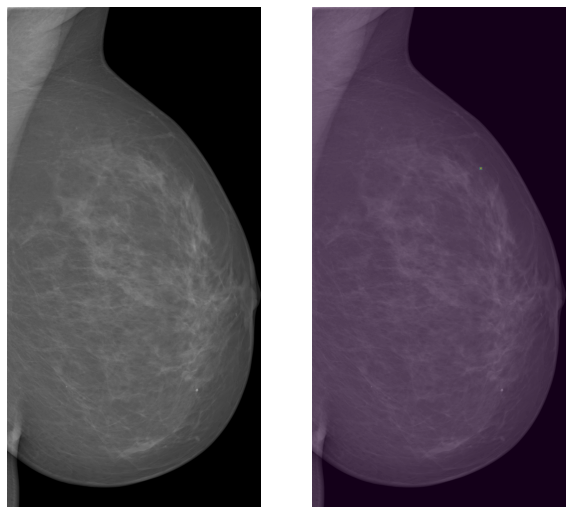

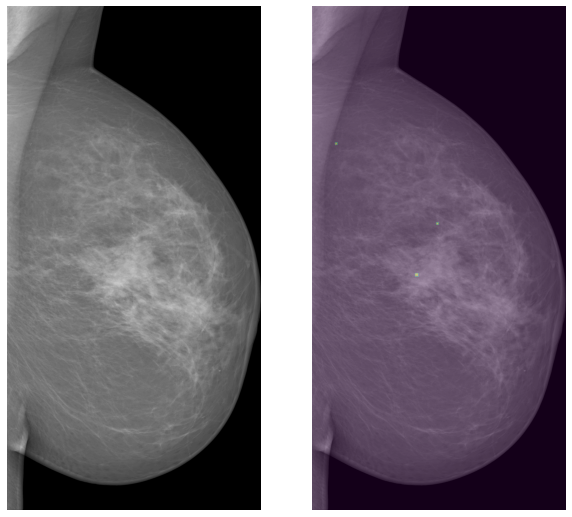

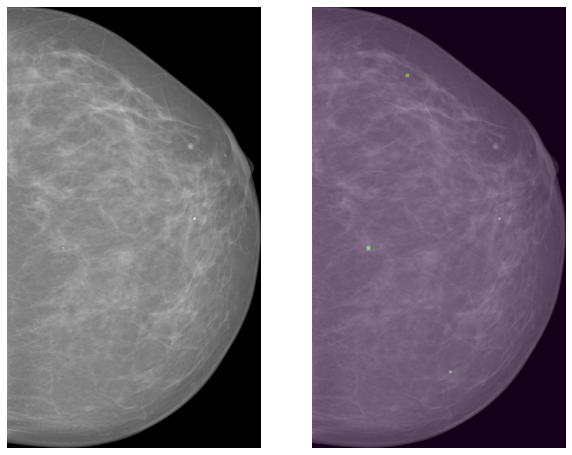

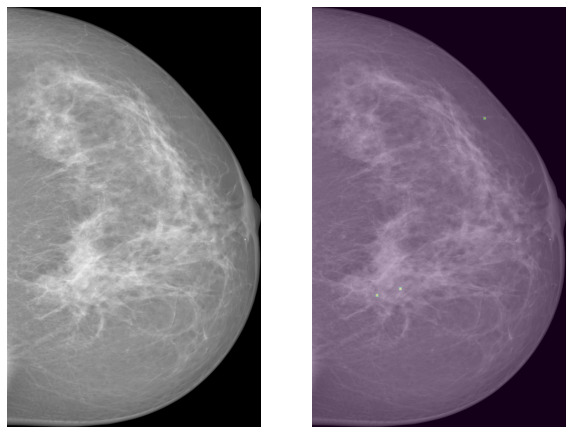

In [27]:
missing = [i for i in brias_normals if i not in normal_imgs_ids]

print(f"Brias normals: {len(brias_normals)}, ours: {len(normal_imgs_ids)}")

imgs_to_check = db.df.loc[db.df.img_id.isin(missing)].index.tolist()
for idx in imgs_to_check:
    img = db[idx]['img']
    mask = db[idx]['lesion_mask']

    plt.figure(figsize=(10,25))
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.subplot(122)
    mask = cv2.dilate(mask, kernel=np.ones((21,21)))
    plt.imshow(img, cmap='gray')
    plt.imshow(mask>0, alpha=0.3)
    plt.axis('off')
    plt.show()

If the images are seen in a higher resolution mCs are indeed present under the regions indicated by the ground truths